The purpose of this code sample is to demontrate a simple analysis and classification excercise I have done with a small set of second hand vehicle purchase data. The classification part consists of predicting if an already purchased vehicle will generate good, average, or negative profit.

The excercise takes the following steps:
1. Load the data and apply statistical analysis to discover the most important features.
2. Train one or more machine learning algorithms on the dataset, provide the test accuracy for each one.
3. Provide conclusions about the experiment and the dataset. Provide possible future work alternatives/reccomendations.

In [1]:
# A bit of setup

import matplotlib.pyplot as plt
import pandas as pd

from tal.dataset import load

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/Users/pranjor/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 1. Load the dataset

In [2]:
raw_data = load()

tal/dataset/dataset.csv


Let's inspect the features

In [3]:
for i, key in enumerate(raw_data.keys()):
    print i, key

0 id
1 mileage
2 customer_id
3 dealership_id
4 interior_condition
5 powertrain
6 vehicle_type
7 structural_damage
8 exterior_condition
9 windshield
10 tires_status
11 tires_needs_new
12 tires_brand
13 wheels_alloy
14 wheels_size
15 wheels_condition
16 year
17 style
18 trans
19 engine
20 drivetrain
21 division
22 base_price
23 tires
24 seats
25 paint
26 color
27 interior_color
28 seconds_in_disposition
29 transports_count
30 bought_price
31 costs
32 profit


In [4]:
raw_data.describe()

,id,mileage,customer_id,dealership_id,interior_condition,powertrain,structural_damage,exterior_condition,windshield,tires_status,tires_needs_new,wheels_alloy,wheels_size,wheels_condition,year,base_price,seconds_in_disposition,transports_count,bought_price,costs
count,6446.000000,6.446000e+03,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6.446000e+03,6446.000000,6446.000000,6446.000000
mean,25603.051039,2.435498e+05,767.399628,359.116661,1.273658,1.897301,0.961371,1.006981,1.913900,1.268228,0.822215,0.003413,16.870773,1.010084,2008.363016,25035.573844,1.174283e+06,0.752715,11664.636984,165.805150
std,15739.877613,1.244394e+07,441.439853,244.092506,0.783585,0.337474,0.192723,0.716933,0.334055,0.777818,1.454042,0.058325,1.485662,0.689762,35.714732,13880.516791,1.740796e+06,0.706155,11597.708309,360.630539
min,231.000000,1.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.750000e+02,0.000000,50.000000,-6951.000000
25%,13236.000000,3.416025e+04,434.000000,178.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,16.000000,1.000000,2005.000000,18771.000000,2.688645e+05,0.000000,2200.000000,35.000000
50%,22760.500000,7.984200e+04,771.000000,284.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,17.000000,1.000000,2010.000000,24574.000000,6.523195e+05,1.000000,8400.000000,135.000000
75%,37796.500000,1.278042e+05,1085.000000,478.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,18.000000,1.000000,2013.000000,32011.250000,1.386046e+06,1.000000,18000.000000,250.000000
max,62683.000000,9.991102e+08,2288.000000,1342.000000,2.000000,2.000000,1.000000,2.000000,2.000000,4.000000,4.000000,1.000000,27.000000,2.000000,2017.000000,160704.000000,4.225880e+07,10.000000,99000.000000,8936.000000


And plot some of the feature distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112672750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112f5e0d0>]], dtype=object)

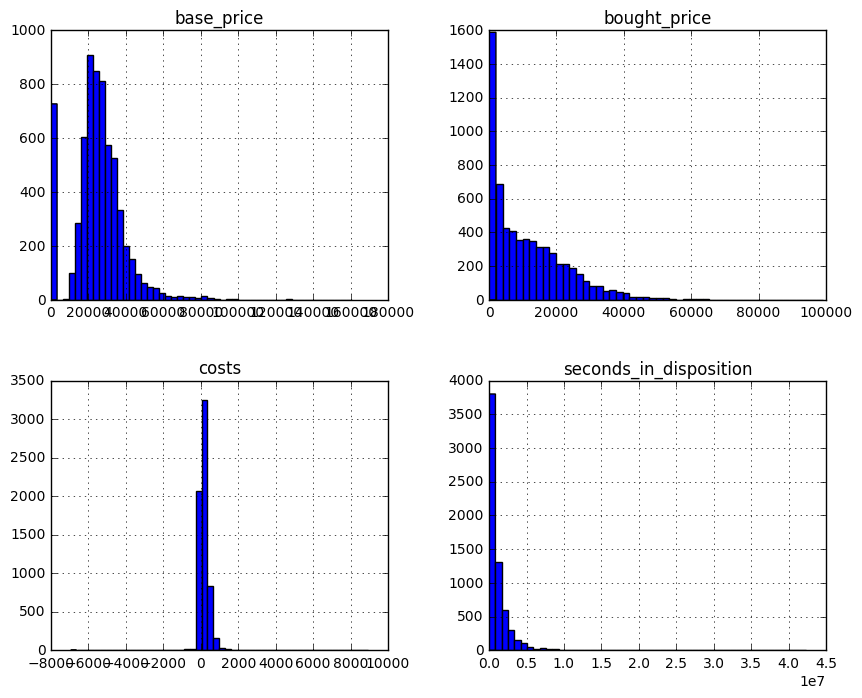

In [5]:
raw_data[['base_price', 'bought_price', 'costs', 'seconds_in_disposition']].hist(bins=50)

In [6]:
raw_data.groupby('profit').profit.count()

profit
average    2241
bad        2147
good       2058
Name: profit, dtype: int64

## 2. Analyze the data

In [72]:
#scale numerical variables to between (0,1)
new_data = raw_data

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
num_var = ['mileage','year','base_price','seconds_in_disposition','transports_count','bought_price','costs']

for i in num_var:
#     new_data[i] = preprocessing.scale(new_data[i])
    new_data[i] = min_max_scaler.fit_transform(new_data[i])

/Users/pranjor/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/pranjor/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/pranjor/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1)

In [73]:
# create dummy variables
cat_var = set(raw_data.columns.values) - set(num_var) - set(['id','customer_id','dealership_id','profit'])

for i in cat_var:
    dummy = pd.get_dummies(raw_data[i],prefix=i)
    new_data = pd.concat([new_data, dummy], axis=1)
    new_data.drop([i,dummy.columns.values[0]],inplace=True, axis=1)

In [74]:
#convert profit from words to level(bad = 0, average = 1, good = 2)
new_data['profit_level'] = 0
new_data.loc[new_data.profit=='average','profit_level'] = 1
new_data.loc[new_data.profit=='good','profit_level'] = 2
new_data = new_data.drop('profit', axis=1)

In [75]:
X = new_data.drop(['id','customer_id','dealership_id','profit_level'],axis=1)
Y = new_data.profit_level

In [ ]:
#use recursive feature elimination to find the most important features

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

car_logistic = LogisticRegression(penalty = 'l2',C = 1000000)
rfe = RFE(car_logistic, 5)
fit = rfe.fit(X, Y)

In [82]:
#conduct chi-square test to find the most importnat featuers

from sklearn.feature_selection import (SelectKBest, chi2)
import numpy

test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)

numpy.set_printoptions(precision=3)

score = fit.scores_
top5 = score.argsort()[-5:][::-1]
X.columns.values[top5]

array(['wheels_condition_2', 'interior_condition_2',
       'exterior_condition_2', 'vehicle_type_Front-Line', 'powertrain_1'], dtype=object)

In [87]:
#perform Principle Component Analysis

from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_

Explained Variance: [ 0.068  0.038  0.033  0.029  0.025]


## 3. Train an algorithm

In [88]:
#Random Forest with cross validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import (accuracy_score,make_scorer)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

param_grid = {'n_estimators':[5,10,20,30], 'min_samples_leaf': [1, 2, 5, 10] , 'max_depth': [None, 5, 10, 50]}

rf = RandomForestClassifier()
scorer = make_scorer(accuracy_score, greater_is_better=True)
clf_rf = GridSearchCV(rf, param_grid, cv = 5, scoring=scorer)
clf_rf.fit(X_train, Y_train)

clf_prediction = clf_rf.predict(X_test)

accuracy_score(Y_test, clf_prediction)

0.51738721804511278

In [97]:
#5 most important features
best_param = clf_rf.best_params_
best_rf = RandomForestClassifier(n_estimators=best_param['n_estimators'], max_depth=best_param['max_depth'], min_samples_leaf=best_param['min_samples_leaf'])
best_rf.fit(X_train,Y_train)

score = best_rf.feature_importances_
top5 = score.argsort()[-5:][::-1]
X.columns.values[top5]

array(['seconds_in_disposition', 'mileage', 'bought_price', 'year',
       'base_price'], dtype=object)

In [128]:
#Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd',learning_rate_init=0.01,max_iter=1000)
mlp.fit(X_train, Y_train)

print mlp.score(X_test,Y_test)

0.459586466165


In [133]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(n_estimators=20)
boosting.fit(X_train, Y_train)
boosting_pred = boosting.predict(X_test)

accuracy_score(Y_test, boosting_pred)

0.57001879699248126

## 4. Conclusions and future work

The most imporant 5 features based on chi-square test are
1. 'wheels_condition_2': wheels condition rated at 2, 
2. 'interior_condition_2': interior condition rated at 2
3. 'exterior_condition_2': exterior conditoin rated at 2
4. 'vehicle_type_Front-Line': front line vehicle type 
5. 'powertrain_1': powertrain rated at 1

The most imporant 5 features based on random forest are seconds_in_disposition, mileage, bought_price, year, and base_price. Intuitively, these features make more sense. However, since the performance of the model is underwhelming, the results can't be completely trusted.

Random Forest, Boosting Trees and MLP perform poorly, just slightly higher than 0.5. There are a few things to be done to improve the perforance:
1. clean the data. Some featuers such as interior color,seats,and engine have messy information. Cleaning these columns could reduce demension as well as improve performance.
2. Some features such as base price and bought price have many 0s. One thing we could do is to create dummy variables that flag 0 cells, since that could be imporant information.
3. The cars might fall under different tiers and different tiers might fit into different models. We could implement clustering and apply different models in each cluster. It's also good for detecting outliers.
4. Other models to try: SVM, boosting trees, Lasso regression (also good for finding important features).
5. cross validate and finetune the parameters for MLP and boosting trees, it was not done successfully due to time constraint.
